In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statistics

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Getting live data from Google Spreadsheet
url = "https://docs.google.com/spreadsheets/d/1Y0iJMsTU4NEv-Iu3XNLYw3xbPIJY7GvdlZYC3r8e6Hw/edit#gid=2110739927"
url_1 = url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url_1)
df.head()

,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,PhoneService
0,1,8260-NGFNY,One,Month-to-month,No,Mailed check,25.2,25.20,Female,0.0,...,No phone service,DSL,No,No,No,No,No,No,Yes,No
1,2,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.7,4134.85,Female,0.0,...,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
2,3,6598/RFFVI,2,One year,No,Credit card (automatic),19.3,28.30,Male,0.0,...,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Yes
3,4,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.1,521.30,Female,0.0,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,Yes
4,5,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.3,324.20,Female,0.0,...,Yes,Fiber optic,No,Yes,No,No,No,No,No,Yes


## EDA

In [3]:
# Dropping the non required index
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,PhoneService
0,8260-NGFNY,One,Month-to-month,No,Mailed check,25.2,25.20,Female,0.0,No,...,No phone service,DSL,No,No,No,No,No,No,Yes,No
1,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.7,4134.85,Female,0.0,Yes,...,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
2,6598/RFFVI,2,One year,No,Credit card (automatic),19.3,28.30,Male,0.0,No,...,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Yes
3,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.1,521.30,Female,0.0,No,...,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,Yes
4,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.3,324.20,Female,0.0,No,...,Yes,Fiber optic,No,Yes,No,No,No,No,No,Yes


In [5]:
# Getting the shape of the dataset
df.shape

(257, 21)

In [6]:
# Columns datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        257 non-null    object 
 1   tenure            257 non-null    object 
 2   Contract          257 non-null    object 
 3   PaperlessBilling  257 non-null    object 
 4   PaymentMethod     257 non-null    object 
 5   MonthlyCharges    247 non-null    float64
 6   TotalCharges      242 non-null    float64
 7   gender            257 non-null    object 
 8   SeniorCitizen     252 non-null    float64
 9   Partner           257 non-null    object 
 10  Dependents        257 non-null    object 
 11  MultipleLines     257 non-null    object 
 12  InternetService   257 non-null    object 
 13  OnlineSecurity    257 non-null    object 
 14  OnlineBackup      257 non-null    object 
 15  DeviceProtection  257 non-null    object 
 16  TechSupport       257 non-null    object 
 1

In [7]:
# Description to find the normal range of data
df.describe()

,MonthlyCharges,TotalCharges,SeniorCitizen
count,247.000000,242.000000,252.000000
mean,62.473482,2267.953719,0.134921
std,31.126525,2270.876564,0.342319
min,3.500000,18.850000,0.000000
25%,25.700000,450.687500,0.000000
50%,70.300000,1313.025000,0.000000
75%,88.325000,3691.187500,0.000000
max,115.100000,8337.450000,1.000000


In [8]:
# Checking if null values are present
df.isnull().sum()

customerID           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
gender               0
SeniorCitizen        5
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
PhoneService         0
dtype: int64

array([[<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>],
       [<AxesSubplot:title={'center':'SeniorCitizen'}>, <AxesSubplot:>]],
      dtype=object)

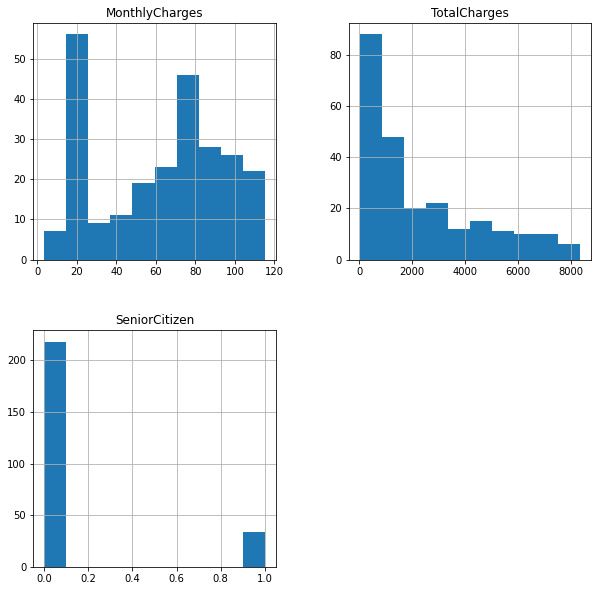

In [9]:
# Checking the distributions of the columns
df.hist(figsize=(10,10))

<AxesSubplot:>

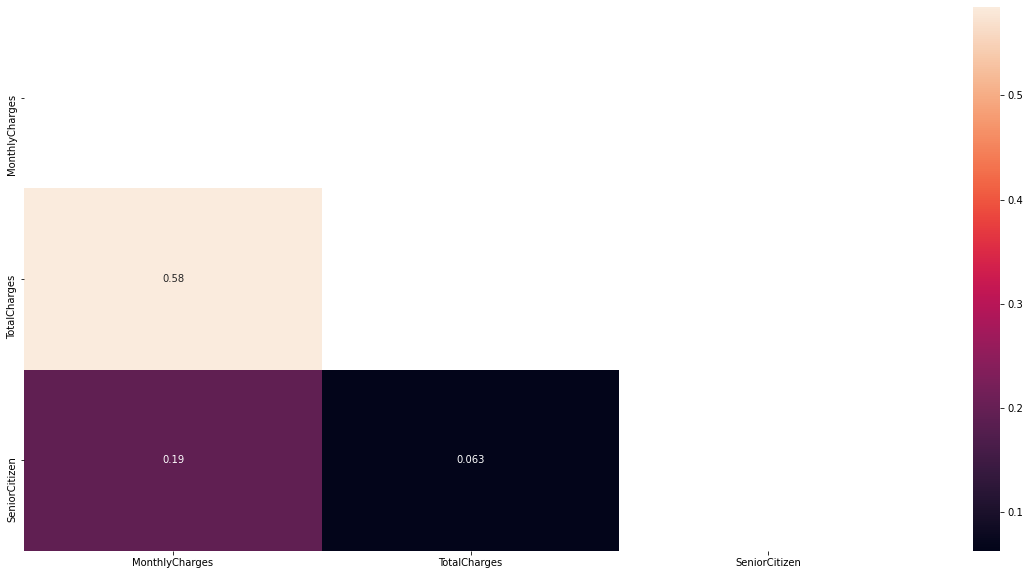

In [10]:
# plotting correlation among the attributes
plt.figure(figsize=(20,10))
corr=df.corr()
mat=np.triu(corr)
sns.heatmap(corr,mask=mat,annot=True)

Text(0.5, 1.0, 'Gender count comparison')

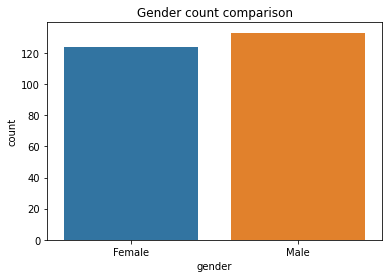

In [11]:
ax = sns.countplot(x=df['gender'])
plt.title('Gender count comparison')

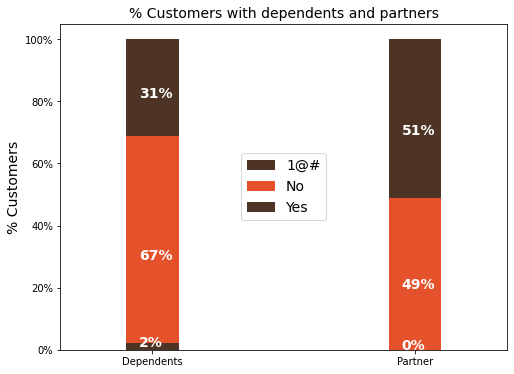

In [12]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

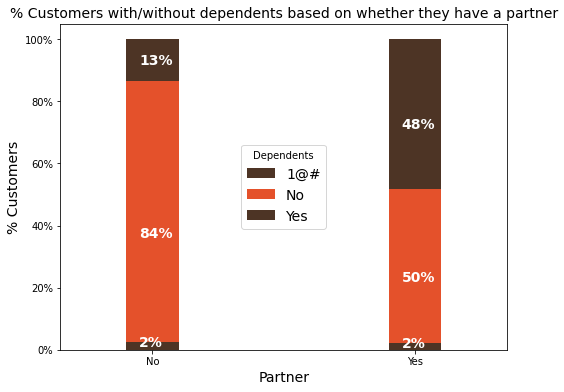

In [13]:
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, '# of Customers by Contract Type')

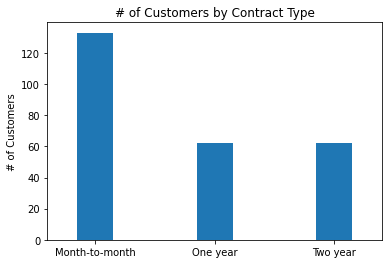

In [14]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

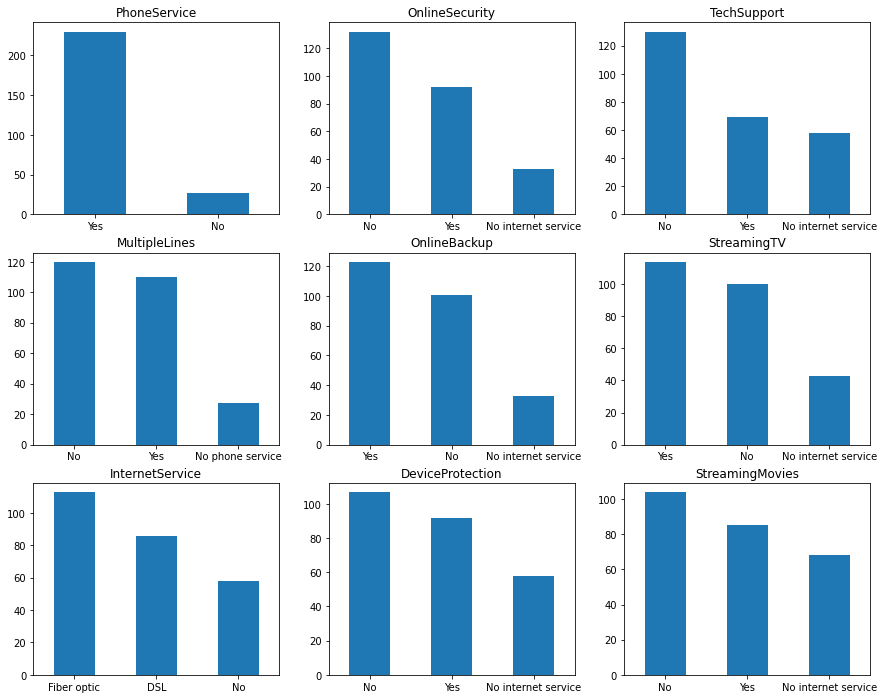

In [15]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

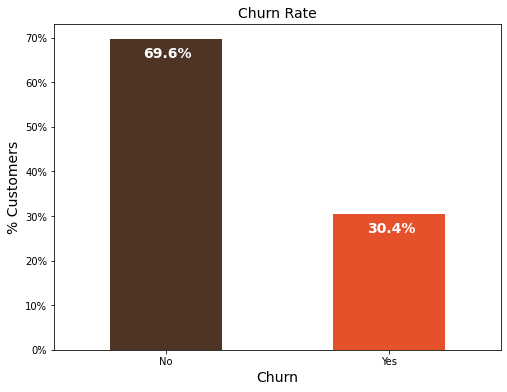

In [16]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

## Observations:
1) Dataset contains null values. Approach for attributes 'MonthlyCharges' and 'TotalCharges' would be replacing null values with zero and for attribute 'SeniorCitizen' would be to fill with average of the attribute
2) Attribute 'tenure' contains string which needs to be converted to a numeric format
3) Encoder needs to be applied for attributes of 'object' datatype

## Preprocessing

In [17]:
# Converting the string values and making the column dtype as int
df['tenure'] = df['tenure'].replace("One","1")
df['tenure'] = df['tenure'].replace("Four","4")
df['tenure'] = df['tenure'].astype(int)
df[['tenure']].info()
print("#"*50)
df['Dependents'] = df['Dependents'].replace("1@#","Yes")
df[['Dependents']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tenure  257 non-null    int32
dtypes: int32(1)
memory usage: 1.1 KB
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Dependents  257 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [18]:
# Filling the null values
df['SeniorCitizen'].fillna(value=df['SeniorCitizen'].mean(),inplace=True)
df['MonthlyCharges'].fillna(value=0,inplace=True)
df['TotalCharges'].fillna(value=0,inplace=True)

In [19]:
# Checking if null values are present
df.isnull().sum()

customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
PhoneService        0
dtype: int64

In [20]:
# Creating a new DataFrame to preserve the original data
df_new = df

In [21]:
# Using Label Encoder for columns with boolean responses
le = LabelEncoder()
labelEcoderColumns = ['PaperlessBilling', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for i in range(len(labelEcoderColumns)):
    df_new[labelEcoderColumns[i]] = le.fit_transform(df_new[labelEcoderColumns[i]])
    
df_new.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn,PhoneService
0,8260-NGFNY,1,Month-to-month,0,Mailed check,25.2,25.20,0,0.0,0,...,1,0,0,0,0,0,0,0,1,0
1,2359-QWQUL,39,One year,1,Credit card (automatic),104.7,4134.85,0,0.0,1,...,0,1,2,0,2,2,2,2,1,1
2,6598/RFFVI,2,One year,0,Credit card (automatic),19.3,28.30,1,0.0,0,...,0,2,1,1,1,1,1,1,1,1
3,IXSTS-8780,6,Month-to-month,1,Electronic check,90.1,521.30,0,0.0,0,...,2,1,0,2,0,0,2,0,1,1
4,2674/MIAHT,4,Month-to-month,1,Mailed check,80.3,324.20,0,0.0,0,...,2,1,0,2,0,0,0,0,0,1


In [22]:
# Using get_dummies for the remaining categorical columns to avoid showing attribute hierarchy
df_new = pd.get_dummies(df_new,columns=['Contract', 'PaymentMethod'])    

In [23]:
df_new.head()

,customerID,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,...,StreamingMovies,Churn,PhoneService,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,8260-NGFNY,1,0,25.2,25.20,0,0.0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,2359-QWQUL,39,1,104.7,4134.85,0,0.0,1,0,0,...,2,1,1,0,1,0,0,1,0,0
2,6598/RFFVI,2,0,19.3,28.30,1,0.0,0,0,0,...,1,1,1,0,1,0,0,1,0,0
3,IXSTS-8780,6,1,90.1,521.30,0,0.0,0,0,2,...,0,1,1,1,0,0,0,0,1,0
4,2674/MIAHT,4,1,80.3,324.20,0,0.0,0,0,2,...,0,0,1,1,0,0,0,0,0,1


In [24]:
df_new.shape

(257, 26)

In [25]:
# Splitting data into independent and dependent variables
X = df_new.drop(['customerID','Churn'],axis=1)
y = df_new[['Churn']]
print(X.shape,y.shape)

(257, 24) (257, 1)


In [28]:
# Train test split to get a validation set
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
print(Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape)

(205, 24) (205, 1) (52, 24) (52, 1)


## Observations:
1) Data is clean and does not have any unnecessary characters
2) Data is split into dependent and independent variables and is ready to be provided as input to the classifier.

## Model Building

In [29]:
# Model 1 logistic Regression
model1 = LogisticRegression().fit(Xtrain,ytrain)
print("Training score = {:.2f}%".format(model1.score(Xtrain,ytrain)/0.01))
print("Validation score = {:.2f}%".format(model1.score(Xtest,ytest)/0.01))
ypred1 = model1.predict(Xtest)

Training score = 78.05%
Validation score = 71.15%


In [30]:
print('\nClassification Report\n')
print(classification_report(ytest, ypred1))


Classification Report

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        34
           1       0.59      0.56      0.57        18

    accuracy                           0.71        52
   macro avg       0.68      0.67      0.68        52
weighted avg       0.71      0.71      0.71        52



Confusion Matrix



<AxesSubplot:>

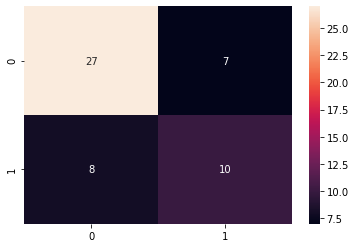

In [31]:
print('Confusion Matrix\n')
cf_matrix = confusion_matrix(ytest,ypred1)

sns.heatmap(cf_matrix, annot=True)

In [32]:
# Model 2 KNN Classifier
model2 = KNeighborsClassifier(n_neighbors=3,p=1).fit(Xtrain,ytrain) # Using Manhatten Distance due to high dimensional data
print("Training score = {:.2f}%".format(model2.score(Xtrain,ytrain)/0.01))
print("Validation score = {:.2f}%".format(model2.score(Xtest,ytest)/0.01))
ypred2 = model2.predict(Xtest)

Training score = 84.39%
Validation score = 69.23%


In [33]:
print('\nClassification Report\n')
print(classification_report(ytest, ypred2))


Classification Report

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.57      0.44      0.50        18

    accuracy                           0.69        52
   macro avg       0.65      0.63      0.64        52
weighted avg       0.68      0.69      0.68        52



Confusion Matrix



<AxesSubplot:>

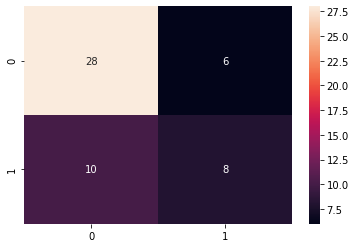

In [34]:
print('Confusion Matrix\n')
cf_matrix = confusion_matrix(ytest,ypred2)

sns.heatmap(cf_matrix, annot=True)

In [35]:
# Model 3 Decision Tree Classifier
model3 = DecisionTreeClassifier().fit(Xtrain,ytrain)
print("Training score = {:.2f}%".format(model3.score(Xtrain,ytrain)/0.01))
print("Validation score = {:.2f}%".format(model3.score(Xtest,ytest)/0.01))
ypred3 = model3.predict(Xtest)

Training score = 100.00%
Validation score = 63.46%


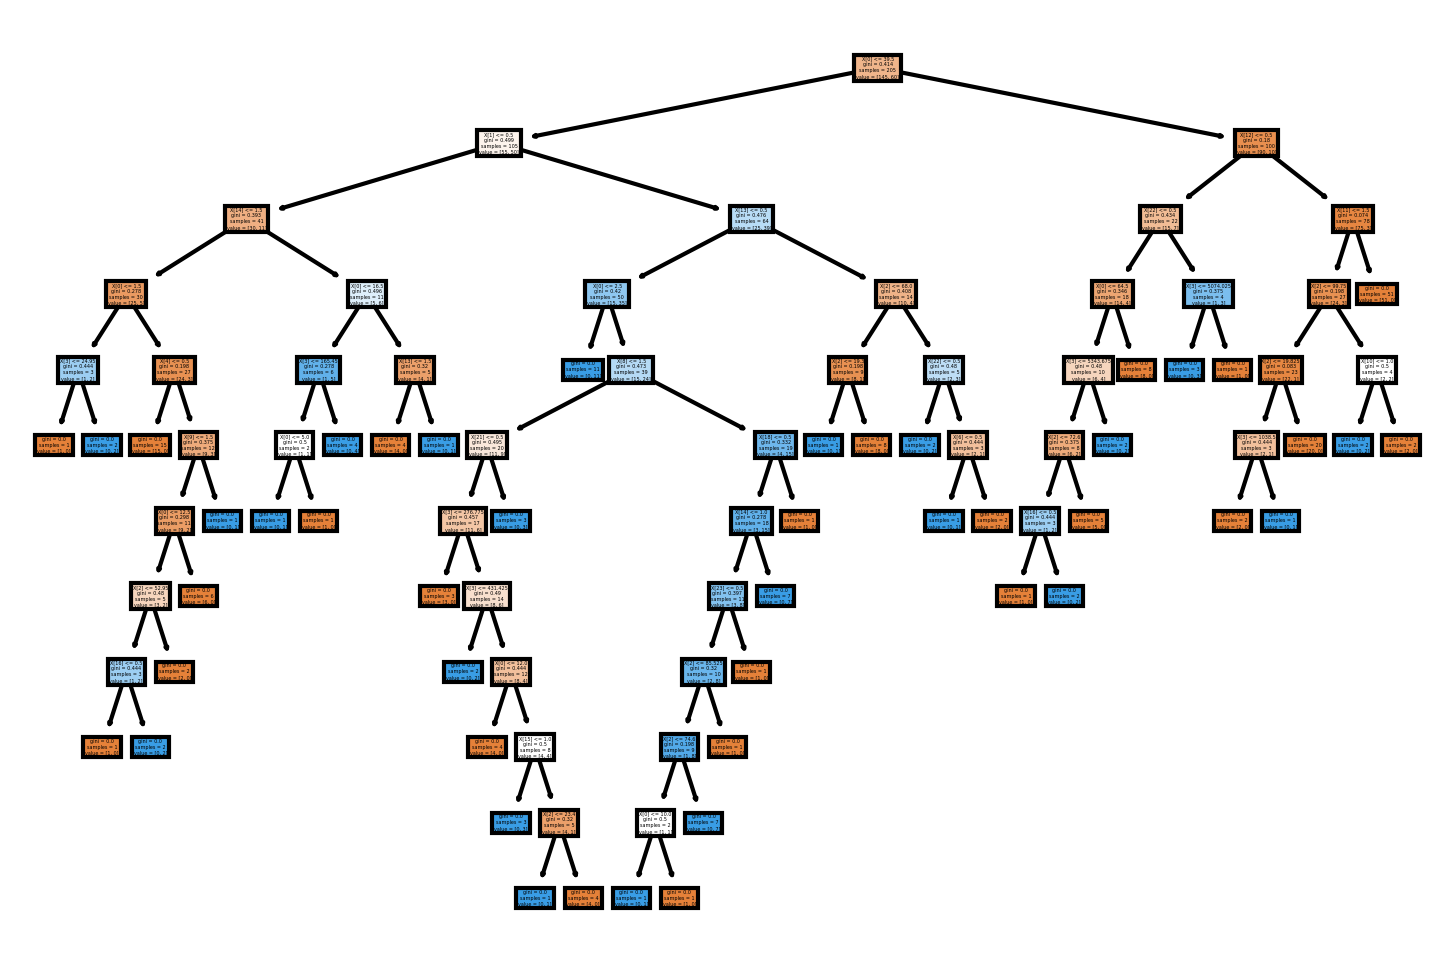

In [36]:
fig,axes = plt.subplots(dpi=300)
tree_graph = tree.plot_tree(model3,filled=True)

In [37]:
print('\nClassification Report\n')
print(classification_report(ytest, ypred3))


Classification Report

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        34
           1       0.48      0.56      0.51        18

    accuracy                           0.63        52
   macro avg       0.61      0.62      0.61        52
weighted avg       0.65      0.63      0.64        52



Confusion Matrix



<AxesSubplot:>

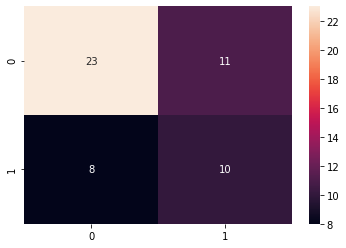

In [38]:
print('Confusion Matrix\n')
cf_matrix = confusion_matrix(ytest,ypred3)

sns.heatmap(cf_matrix, annot=True)

In [39]:
test_score = [model1.score(Xtest, ytest),model2.score(Xtest, ytest),model3.score(Xtest, ytest)]
train_score = [model1.score(Xtrain, ytrain),model2.score(Xtrain, ytrain),model3.score(Xtrain, ytrain)]
col = {'Train score':train_score,'Test score':test_score}

models = ['Logistic Regression','KNN Classifier','Decision Tree Classifier']
f_score = pd.DataFrame(data=col,index=models)
f_score

,Train score,Test score
Logistic Regression,0.780488,0.711538
KNN Classifier,0.843902,0.692308
Decision Tree Classifier,1.000000,0.634615


In [40]:
ytest = le.inverse_transform(ytest)
ypred = le.inverse_transform(ypred2)

col = {'Y Actual':ytest,'Y Predicted':ypred}
results = pd.DataFrame(col)

In [41]:
results.sample(10)

,Y Actual,Y Predicted
39,No,No
46,No,No
26,Yes,No
30,No,No
7,No,No
33,No,Yes
41,Yes,Yes
16,No,No
50,No,No
44,No,No


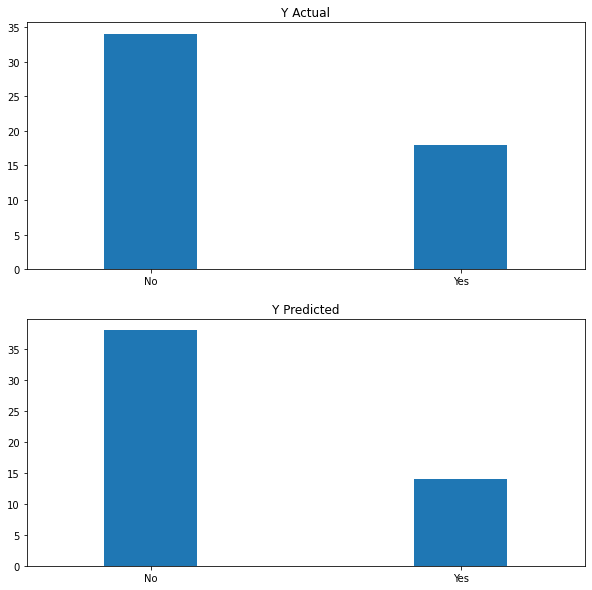

In [42]:
plt.title('Actual vs Predicted values')
plt.subplot(2,1,1)
plt.title('Y Actual')
ax = results['Y Actual'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3,figsize=(10,10))

plt.subplot(2,1,2)
plt.title('Y Predicted')
ax = results['Y Predicted'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3,figsize=(10,10))

## Results:
1) KNN has best accuracy and score in terms of both training and validation data
2) Decision Tree showed overfitting in training
3) Model is able to predict the dependent attribute

In [43]:
Xtest.columns

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [44]:
Xtest.iloc[0]

tenure                                       72.00
PaperlessBilling                              0.00
MonthlyCharges                              114.45
TotalCharges                               8100.55
gender                                        1.00
SeniorCitizen                                 0.00
Partner                                       1.00
Dependents                                    1.00
MultipleLines                                 2.00
InternetService                               1.00
OnlineSecurity                                2.00
OnlineBackup                                  2.00
DeviceProtection                              2.00
TechSupport                                   2.00
StreamingTV                                   2.00
StreamingMovies                               2.00
PhoneService                                  1.00
Contract_Month-to-month                       0.00
Contract_One year                             0.00
Contract_Two year              

In [45]:
# Model test
# Arranging data as per the attributes provided to the model
labels = Xtest.columns
uinput = [45,0,42.5,2234.8,1,1.0,0,1,0,0,0,0,0,0,2,0,2,0,1,0,1,0,0,0]

res = {}
for key in labels:
    for value in uinput:
        res[key] = value
        uinput.remove(value)
        break 
        
data = pd.DataFrame(res,index=[0])

In [46]:
data

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,PhoneService,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,45,0,42.5,2234.8,1,1.0,0,1,0,0,...,2,0,2,0,1,0,1,0,0,0


In [47]:
prediction = le.inverse_transform(model2.predict(data))
print(prediction)

['Yes']
